# Practical assignment 1

In [1]:
#import librairies
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
os.getcwd()

'/home/anproulx/assignment_1/environ/analysis'

In [5]:
os.chdir("/home/anproulx/Proulx-Andr-anne-QLSC612/practical")

In [6]:
#Read the data file
data=pd.read_csv("brainsize.csv", delimiter=";", na_values='.')
data=data.set_index("Unnamed: 0")
data=data.drop("MRI_Count", axis=1)

data.head()
#print(len(data))

,Gender,FSIQ,VIQ,PIQ,Weight,Height
Unnamed: 0,,,,,,
1,Female,133,132,124,118.0,64.5
2,Male,140,150,124,NaN,72.5
3,Male,139,123,150,143.0,73.3
4,Male,133,129,128,172.0,68.8
5,Female,137,132,134,147.0,65.0


In [7]:
#Create variable of random noise
np.random.seed(0) #initiate a seed
partY= np.random.normal(0,1,40)

#Add to the existing dataframe
data["partY"]=partY
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,partY
Unnamed: 0,,,,,,,
1,Female,133,132,124,118.0,64.5,1.764052
2,Male,140,150,124,NaN,72.5,0.400157
3,Male,139,123,150,143.0,73.3,0.978738
4,Male,133,129,128,172.0,68.8,2.240893
5,Female,137,132,134,147.0,65.0,1.867558


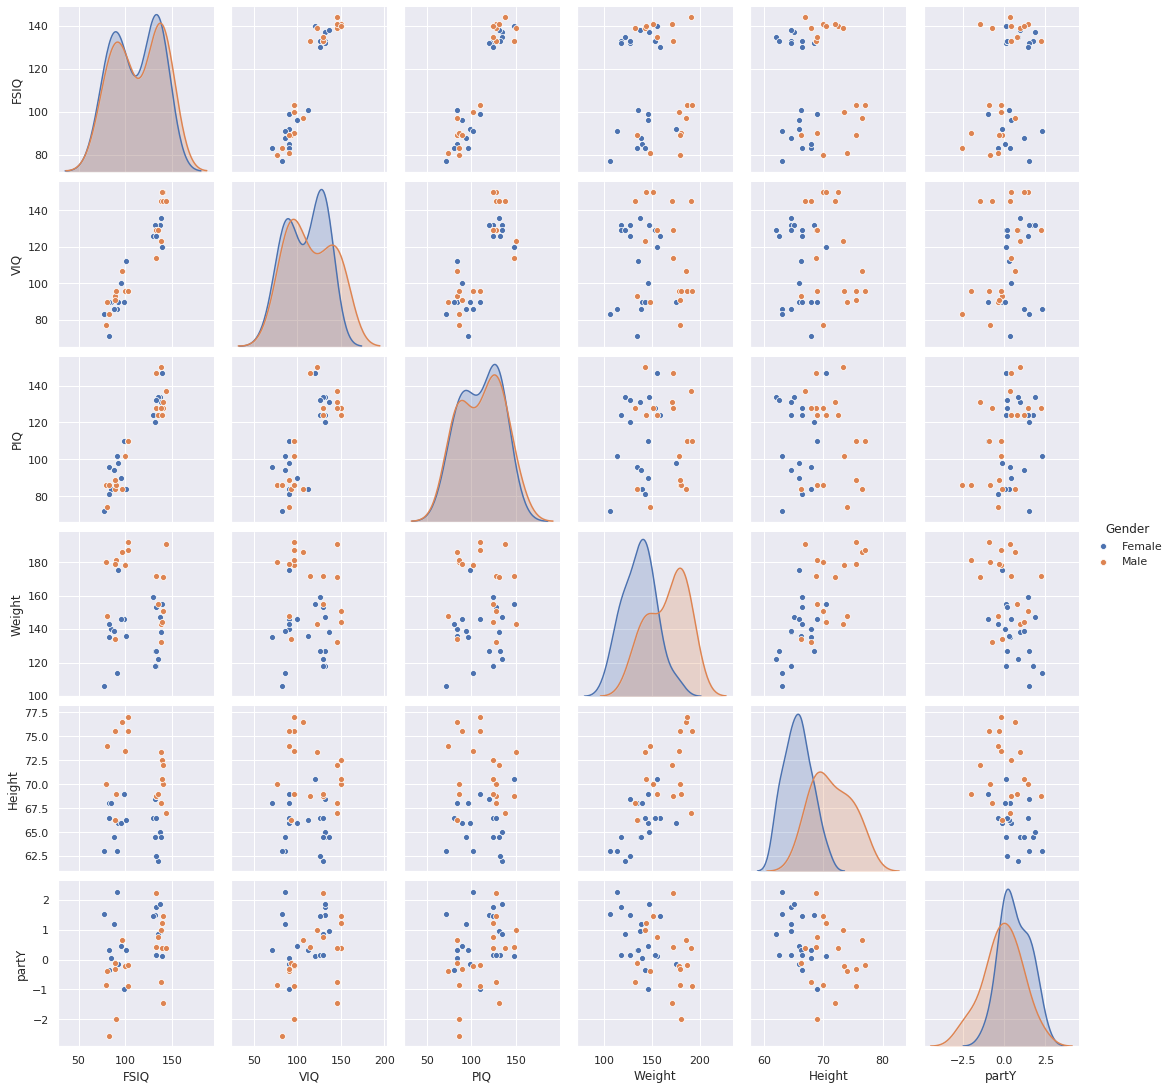

In [8]:
#Plot association between continuous variables according to gender
sns.set()
sns.pairplot(data, hue="Gender")

In [12]:
#generate predictions of the partY variable until finds significant results
from itertools import combinations

# P-hacking

Multiple testing increases the statistical chance of finding significant results. In order to find a significant prediction, we are going to run/test multiple models using different combinations of features from the "data". These combinations will be defined using itertools.combinations which will find all possible combinations for a model with 4 explanatory variable with the 6 features available, without regard to order. All significant results will be stored in a list. 

First predicting the partY variable

In [13]:
#Get different combinations of feature variables to use as explanatory variables

combination=[]
comb= set(combinations(data.drop("partY", axis=1) , 4))

for val in comb:
    combination.append(val)
    
print(combination)

[('FSIQ', 'VIQ', 'Weight', 'Height'), ('Gender', 'VIQ', 'PIQ', 'Weight'), ('Gender', 'FSIQ', 'Weight', 'Height'), ('FSIQ', 'PIQ', 'Weight', 'Height'), ('FSIQ', 'VIQ', 'PIQ', 'Height'), ('VIQ', 'PIQ', 'Weight', 'Height'), ('Gender', 'VIQ', 'Weight', 'Height'), ('Gender', 'PIQ', 'Weight', 'Height'), ('FSIQ', 'VIQ', 'PIQ', 'Weight'), ('Gender', 'VIQ', 'PIQ', 'Height'), ('Gender', 'FSIQ', 'PIQ', 'Weight'), ('Gender', 'FSIQ', 'PIQ', 'Height'), ('Gender', 'FSIQ', 'VIQ', 'Height'), ('Gender', 'FSIQ', 'VIQ', 'Weight'), ('Gender', 'FSIQ', 'VIQ', 'PIQ')]



 ('FSIQ', 'VIQ', 'PIQ', 'Height') 

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.634
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0511
Time:                        13:38:08   Log-Likelihood:                -48.991
No. Observations:                  39   AIC:                             108.0
Df Residuals:                      34   BIC:                             116.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      

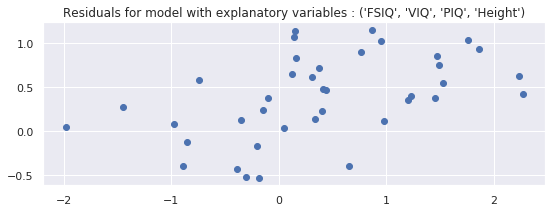

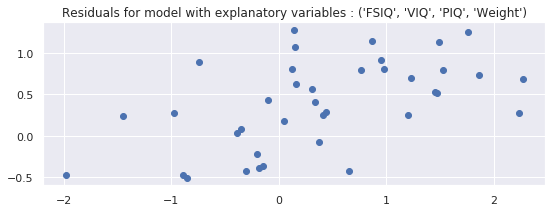

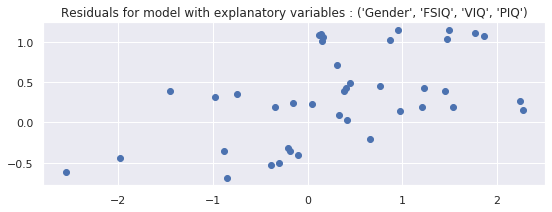

In [14]:
# Apply the model to the data using theses combinations

# Initiate lists 
list_significant=[] #list of significant results
list_ind=[] #list of index of the features thats corresponds to a significant beta
X=data[["Gender","FSIQ", "PIQ", "VIQ", "Height", "Weight"]]

# Loop through the list of combinations
for val in combination:
    name_var1=str(val[0])
    name_var2=str(val[1])
    name_var3=str(val[2])
    name_var4=str(val[3])
    
    # Explanatory variable of the model
    feat_1=data[name_var1]
    feat_2=data[name_var2]
    feat_3=data[name_var3]
    feat_4=data[name_var4]
    
    # Fit the model to the data 
    model = ols("partY ~ feat_1 + feat_2 + feat_3 + feat_4", data).fit()
    
    pval=model.pvalues
    
    # For results <0.05 
    for index, value in pval.items():
        if index!="Intercept":
            if value <= 0.05:
                ind_sig=index
                
                #add to lists
                list_ind.append(index)
                list_significant.append(val)
                
                #print stats
                print("\n", val, "\n")
                print(model.summary())
                
                #plot residuals
                plt.figure(figsize=(9, 3))
                y_pred= model.predict(exog=X)
                plt.plot(partY, y_pred , "o")
                plt.title("Residuals for model with explanatory variables : {}".format(val))
                
#print(list_significant)
#print(list_ind)

In [19]:
#report models with p<0.05

p_hack_significant=pd.DataFrame() #create df

#add columns to the df
p_hack_significant["model showing significant result"]=list_significant
p_hack_significant["predictive feature"]=list_ind

print ("We find {0} significant models with significant betas.For the first model and the third tested, the Weight variable is predictive of the partY variable. For the second model, the gender variable is predictive of the partY variable".format(len(p_hack_significant)))

p_hack_significant.head()

We find 3 significant models with significant betas.For the first model and the third tested, the Weight variable is predictive of the partY variable. For the second model, the gender variable is predictive of the partY variable


,model showing significant result,predictive feature
0,"(FSIQ, VIQ, PIQ, Height)",feat_4
1,"(FSIQ, VIQ, PIQ, Weight)",feat_4
2,"(Gender, FSIQ, VIQ, PIQ)",feat_1[T.Male]


Predicting the partY2 variable

In [21]:
# Create new random variable partY 2

np.random.seed(2) #initiate new seed
partY2= np.random.normal(0 , 1 , 40)
data["partY2"]=partY2

# Drop partY from initial dataframe
data_2=data.drop("partY", axis=1)
data_2.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,partY2
Unnamed: 0,,,,,,,
1,Female,133,132,124,118.0,64.5,-0.416758
2,Male,140,150,124,NaN,72.5,-0.056267
3,Male,139,123,150,143.0,73.3,-2.136196
4,Male,133,129,128,172.0,68.8,1.640271
5,Female,137,132,134,147.0,65.0,-1.793436


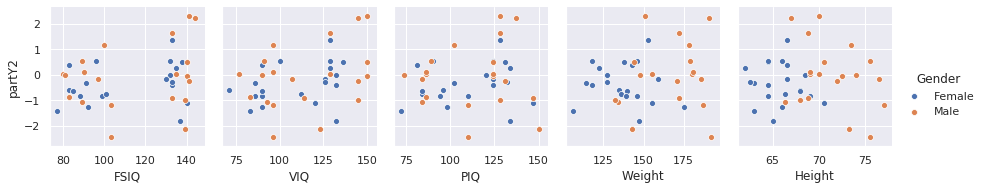

In [22]:
# Visualize associations between partY2 and other variables according to gender

g = sns.pairplot(data_2, 
                 x_vars=["FSIQ","VIQ","PIQ", "Weight", "Height"],
                 y_vars=["partY2"], hue="Gender")


 ('FSIQ', 'VIQ', 'Weight', 'Height') 

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     3.698
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0135
Time:                        13:41:01   Log-Likelihood:                -48.957
No. Observations:                  38   AIC:                             107.9
Df Residuals:                      33   BIC:                             116.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

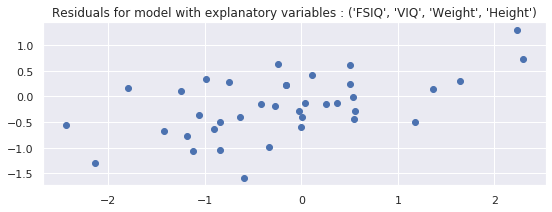

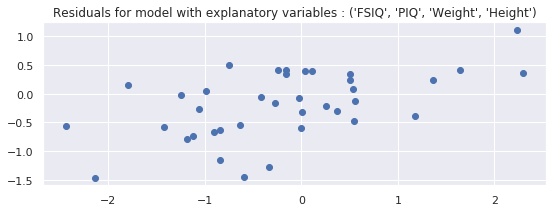

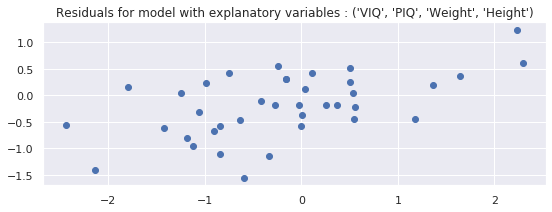

In [23]:
# Rerun model, this time predicting the partY2 variable instead

list_significant_2=[] #list of significant results
list_ind_2=[]#list of index of the features thats corresponds to a significant beta
pval_list=[]

for val in combination:
    name_var1=str(val[0])
    name_var2=str(val[1])
    name_var3=str(val[2])
    name_var4=str(val[3])
    
    feat_1=data_2[name_var1]
    feat_2=data_2[name_var2]
    feat_3=data_2[name_var3]
    feat_4=data_2[name_var4]
    
    # Fit the model 
    model_2 = ols("partY2 ~ feat_1 + feat_2 + feat_3 + feat_4", data_2).fit() #change partY to partY2

    pval_2=model_2.pvalues
    
    pval_list.append(pval_2)
    
    # For results <0.05 
    for index, value in pval_2.items():
        if index!="Intercept": 
            if value <= 0.05:
                ind_sig=index
                
                #add to lists
                list_significant_2.append(val)
                list_ind_2.append(index)
                
                #print stats
                print("\n", val, "\n")
                print(model_2.summary())
                
                #plot residuals
                plt.figure(figsize=(9, 3))
                y_pred_2= model_2.predict(exog=X)
                plt.plot(partY2, y_pred_2 , "o")
                plt.title("Residuals for model with explanatory variables : {}".format(val))
                
            break

In [27]:
# Report only the models with p<0.05

p_hack_significant_2=pd.DataFrame() #create df

# Add columns to the df
p_hack_significant_2["model showing significant results"]=list_significant_2


print ("For variable partY2, we find {0} significant results. For the each of these models, the effect of feat 1, feat 2 and feat 3 are <.05.".format(len(p_hack_significant_2)))

p_hack_significant_2



For variable partY2, we find 3 significant results. For the each of these models, the effect of feat 1, feat 2 and feat 3 are <.05.


,model showing significant results
0,"(FSIQ, VIQ, Weight, Height)"
1,"(FSIQ, PIQ, Weight, Height)"
2,"(VIQ, PIQ, Weight, Height)"


This concludes the p-hacking exercice. With a random variable and multiple testing of models, we were able to find significant results. 